# Network Science - MDS - UDD 2022
## Introducción a Ciencia de Redes


#### Patricio Ramirez
#### Pablo Elgueta


Referencias:
1. https://publish.illinois.edu/pynetworkshop/
2. https://github.com/MridulS/pydata-networkx



### Redes? Grafos?

Una estructura matemática utilizada para modelar relaciones por pares entre objetos, donde los objetos generalmente se denominan `nodos` y la relación entre ellos `enlaces`.

$G = (V, E)$

$V$ = conjunto de nodos/vértices

$E$ = conjunto de $(x, y)$ enlaces

In [1]:
# Module 1: Comenzando con NetworkX

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import collections

import networkx as nx

%matplotlib inline

import urllib.request as urllib
import io

# path = 'https://saref.github.io/teaching/PyNetworkshop/'

## Trabajemos en una red real

La red de colaboración Arxiv GR-QC (Relatividad General y Cosmología Cuántica) es de e-print arXiv y cubre las colaboraciones científicas entre los artículos de los autores enviados a la categoría de Relatividad General y Cosmología Cuántica. Si un autor $i$ es coautor de un artículo con el autor $j$, el grafo contiene un enlace no dirigido entre $i$ y $j$. Si el artículo es co-autoreado por $k$ autores, esto genera un (sub) grafo completamente conectado con $k$ nodos.

fuente: http://snap.stanford.edu/data/index.html#canets

In [2]:
# crear un grafo de autor a partir del conjunto de datos
import csv
authors_graph = nx.Graph()

with open('data/CA-GrQc.txt', 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    for row in reader:
        authors_graph.add_edge(row[0], row[1])

In [3]:
type(authors_graph)

networkx.classes.graph.Graph

In [4]:
print(authors_graph.number_of_edges())
print(authors_graph.number_of_nodes())

14496
5242


In [38]:
#authors_graph.nodes()

In [6]:
(authors_graph['3466'])

AtlasView({'937': {}, '5233': {}, '8579': {}, '10310': {}, '15931': {}, '17038': {}, '18720': {}, '19607': {}})

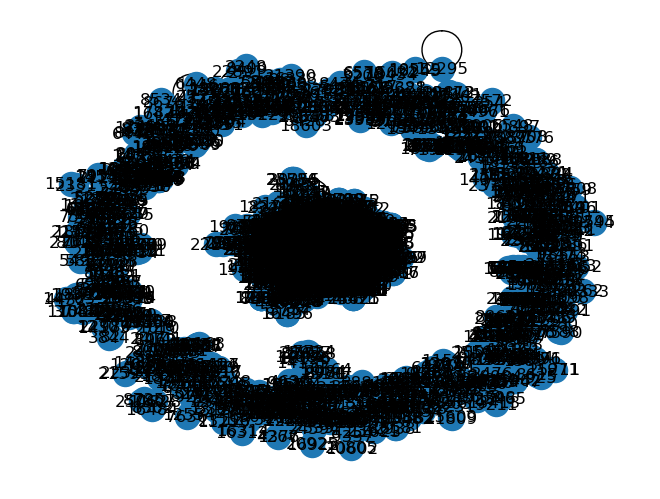

In [7]:
nx.draw(authors_graph,with_labels=True)

#### ¿Podemos encontrar al investigador más influyente/importante en esta red?

##### ¿Cómo evaluamos la importancia de algunas personas en una red?

Dentro de una red social, habrá determinadas personas que desempeñen determinadas funciones importantes. Por ejemplo, puede haber personas hiperconectadas que estén conectadas con muchas, muchas más personas. Ellas serán claves para la difusión de información. Alternativamente, si se tratara de una red de contactos de enfermedades, identificarlos sería útil para detener la propagación de enfermedades. 

#### ¿Cómo se identificaría a estas personas?

### Ejercicio 1

Cree una lista de tuplas (nodo, grado de nodo) y busque el nodo con el grado máximo.

grado de nodo = número de vecinos

In [39]:
#authors_graph.degree()

In [18]:
degrees = list(dict(authors_graph.degree()).values())
pd.DataFrame(degrees).transpose()

,0,1,2,3,4,5,6,7,8,9,...,5232,5233,5234,5235,5236,5237,5238,5239,5240,5241
0,8,5,2,5,13,10,17,3,4,8,...,1,1,1,1,1,1,1,2,2,2


In [28]:
kmax = max(degrees)
kmax

81

In [51]:
print(f"El nodo que contiene el grado maximo {kmax} es el", list(dict(authors_graph.degree()).keys())[list(dict(authors_graph.degree()).values()).index(kmax)])

El nodo que contiene el grado maximo 81 es el 21012


El grado de un nodo se traduce en grado de centralidad (que es una versión normalizada de grado)

In [37]:
nx.degree_centrality(authors_graph)

{'3466': 0.0015264262545315779,
 '937': 0.0009540164090822362,
 '5233': 0.00038160656363289447,
 '8579': 0.0009540164090822362,
 '10310': 0.002480442663613814,
 '15931': 0.0019080328181644724,
 '17038': 0.003243655790879603,
 '18720': 0.0005724098454493417,
 '19607': 0.0007632131272657889,
 '1854': 0.0015264262545315779,
 '4583': 0.0005724098454493417,
 '9572': 0.006487311581759206,
 '10841': 0.0013356229727151307,
 '13056': 0.0019080328181644724,
 '14982': 0.00038160656363289447,
 '16310': 0.003243655790879603,
 '19640': 0.004770082045411181,
 '23855': 0.0015264262545315779,
 '24372': 0.00019080328181644724,
 '24814': 0.0040068689181453915,
 '5052': 0.00553329517267697,
 '899': 0.0005724098454493417,
 '1796': 0.00038160656363289447,
 '2287': 0.0026712459454302615,
 '3096': 0.0022896393817973667,
 '3386': 0.0020988360999809196,
 '4472': 0.0007632131272657889,
 '5346': 0.003816065636328945,
 '5740': 0.00019080328181644724,
 '6094': 0.0007632131272657889,
 '6376': 0.00038160656363289447,

In [50]:
print(f"El nodo que contiene el grado de centralidad maximo {max(nx.degree_centrality(authors_graph).values())} es el", list(dict(nx.degree_centrality(authors_graph)).keys())[list(dict(nx.degree_centrality(authors_graph)).values()).index(max(nx.degree_centrality(authors_graph).values()))])

El nodo que contiene el grado de centralidad maximo 0.015455065827132226 es el 21012


### Ejercicio 2

Trace un histograma de centralidad de grado de author_graph.

Sugerencia: `plt.hist(list_of_values)` trazará un histograma

(count vs grado)

#### Echemos un vistazo a los componentes conectados de un grafo.

En la teoría de grafos, un componente conectado (o simplemente un componente) de un grafo **no dirigido** es un subgrafo en el que dos vértices cualesquiera están conectados entre sí por caminos, y que no está conectado a ningún vértice adicional en el supergrafo.

In [ ]:
G = nx.erdos_renyi_graph(n=10, p=0.15, seed=1)
nx.draw(G, with_labels=True)

In [ ]:
print([len(c) for c in sorted(nx.connected_components(authors_graph),
                              key=len, reverse=True)])


Nota: la función sorted () tiene un parámetro opcional llamado `key` que toma una función como su valor. Esta función `key` transforma cada elemento antes de ordenar, toma el valor y se usa dentro de `sorted` en lugar del valor original.

In [ ]:
# Guardamos subgrafos en una lista
graphs = [authors_graph.subgraph(c).copy() for c in sorted(nx.connected_components(authors_graph), key=len, reverse=True)]


In [ ]:
len(graphs[0])

##### Camino más corto de la red

In [ ]:
print(nx.shortest_path(graphs[0], '22504', '23991'))#camino entre a y b.
print(len(nx.shortest_path(graphs[0], '22504', '23991')))#distancia en nodos (incluye ppio y fin)
print(nx.shortest_path_length(graphs[0], '22504', '23991'))#distancia en enlaces (#nodos-1)

In [ ]:
# help(nx.shortest_path)

### Plot redes con nodos de distinto tamaño

In [ ]:
g = graphs[1]# ejemplo
pos=pos = nx.spring_layout(g) # Layout para la red (coordenadas de los nodos y enlaces)

In [ ]:
nx.draw(g,pos)

In [ ]:
#Codigo para el tamaño del nodo
# g = graphs[0]# ejemplo
# pos=pos = nx.spring_layout(g) # Layout para la red (coordenadas de los nodos y enlaces)


degree_g = dict(nx.degree(g))
clustering_g=dict(nx.clustering(g))

nx.draw(g,pos, nodelist=degree_g.keys(), node_size=[v*100 for v in degree_g.values()])
plt.show()


nx.draw(g, pos,nodelist=clustering_g.keys(), node_size=[v *1000 for v in clustering_g.values()])
plt.show()

# nx.draw(g,pos, nodelist=list(degree_g.keys()), node_size=[v**(1/2) for v in degree_g.values()])
# plt.show()


### Grado de nodo vs coeficiente de clustering

In [ ]:
degree_g = dict(nx.degree(graphs[0]))
clustering_g=dict(nx.clustering(graphs[0]))

x = degree_g.values()
y = clustering_g.values()


# colors = np.random.rand(N)
# area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, alpha=0.5)
plt.show()


# MUNDO PEQUEÑO
### Ejercicio 3
##### Seis grados de separación, número de Erdos, número de Bacon !!



<img src="img/im1.png" width="800" height="400">

<img src="img/smallw1.png" width="800" height="400">

<img src="img/smallw2.png" width="800" height="400">
<img src="img/smallw3.png" width="800" height="400">


<a href="https://oracleofbacon.org">https://oracleofbacon.org</a>





<img src="img/im2.png" width="800" height="400">

<img src="img/erdos1.png" width="800" height="400">


<a href="https://www.csauthors.net/">https://www.csauthors.net/</a>

Encuentre el "número" del autor '22504' del grafo `author_graph`, si no hay conexión entre los nodos, asignele el número '-1'.
También trace un histograma del "número" autor '22504'.

Encuentre la longitud de ruta más corta promedio en el primer componente, es decir, `graphs[0]`

SUGERENCIA: `nx.shortest_path_length`

In [ ]:
d = {}
for node in authors_graph.nodes():#para cada nodo
    try:
        #calcula la longitud del camino mas corto entre node y `22504`
        d[node] = nx.shortest_path_length(graphs[0], '22504', node) #21012;22504
    except:
        #si arroja error (no hay camino) asinga un -1.
        next

In [ ]:
d

In [ ]:
plt.hist(list(d.values()))
plt.show()

In [ ]:
# Calcule el promedio de la longitud de los caminos más cortos de todo el grafo aca:

np.mean(list(d.values()))

# Cambiemos de tema y hablemos de Juego de tronos (Network of Thrones)

¿Es sorprendente verdad? ¿Cuál es la relación entre un programa de televisión / novela de fatansia y la ciencia de redes o Python?

Si no has oído hablar de Game of Thrones, entonces debes ser muy bueno para aislarte. Game of Thrones es la popular serie de televisión de HBO basada en la (también) popular serie de libros "A Song of Ice and Fire" de George R.R. Martin. 

Ahora, analizaremos la red de co-ocurrencia de los personajes en los libros de Juego de Tronos. Aquí, se considera que dos personajes coexisten si sus nombres aparecen en hasta a 15 palabras de distancia entre sí en los libros.

<!-- ![](img/got.png) -->

<img src="img/got.png" width="800" height="400">


In [ ]:
# !conda install --yes --prefix {sys.prefix} community # 

# # !conda install --yes --prefix {sys.prefix} python-louvain # 

# !pip install python-louvain


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm
# import community
from community import community_louvain
import numpy as np


%matplotlib inline

### Cargamos los datasets

In [ ]:
book1 = pd.read_csv('data/asoiaf-book1-edges.csv')
book2 = pd.read_csv('data/asoiaf-book2-edges.csv')
book3 = pd.read_csv('data/asoiaf-book3-edges.csv')
book4 = pd.read_csv('data/asoiaf-book4-edges.csv')
book5 = pd.read_csv('data/asoiaf-book5-edges.csv')

El DataFrame resultante `book1` tiene 5 columnas: origen, destino, tipo, peso y libro. El origen y el destino son los dos nodos que están vinculados por un enlace. Una red puede tener enlaces dirigidos o no dirigidos y en esta red todos los enlaces no están dirigidos. El atributo de peso de cada enlace nos dice el número de interacciones que los personajes han tenido sobre el libro, y la columna del libro nos dice el número del libro.

In [ ]:
# book1.head()
book1.sort_values('weight',ascending=False).head()

Una vez que tenemos los datos cargados como un DataFrame de pandas, es hora de crear una red. Creamos un grafo para cada libro. Es posible crear un MultiGraph en lugar de 5 grafos, pero es más fácil jugar con diferentes gráficos.

In [ ]:
G_book1 = nx.Graph()
G_book2 = nx.Graph()
G_book3 = nx.Graph()
G_book4 = nx.Graph()
G_book5 = nx.Graph()

Completemos el grafo con los enlaces del DataFrame de pandas.

In [ ]:
for row in book1.iterrows(): #Itera las filas de DataFrame como pares (index, series).
    G_book1.add_edge(row[1]['Source'], row[1]['Target'],weight=row[1]['weight'], book=row[1]['book'])

In [ ]:
row

In [ ]:
for row in book2.iterrows():
    G_book2.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])
for row in book3.iterrows():
    G_book3.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])
for row in book4.iterrows():
    G_book4.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])
for row in book5.iterrows():
    G_book5.add_edge(row[1]['Source'], row[1]['Target'], weight=row[1]['weight'], book=row[1]['book'])

In [ ]:
books = [G_book1, G_book2, G_book3, G_book4, G_book5]

Echemos un vistazo a estos enlaces

In [ ]:
list(G_book1.edges(data=True))[16]#data=True muestra los atributos del enlace: peso y libro en este caso

In [ ]:
list(G_book1.edges(data=True))[400]

In [ ]:
len(list(G_book1.edges()))

### Encontrar el nodo/personaje más importante en estas redes.

¿Es Jon Snow, Tyrion, Daenerys o alguien más? ¡Vamos a ver! Network Science nos ofrece muchas métricas diferentes para medir la importancia de un nodo en una red como vimos en la primera parte del taller. 

**Tenga en cuenta que no existe una forma "correcta" de calcular el nodo más importante de una red, cada métrica tiene un significado diferente.**

Primero, midamos la importancia de un nodo en una red observando la cantidad de vecinos que tiene, es decir, la cantidad de nodos a los que está conectado. Por ejemplo, una cuenta influyente en Twitter, donde la relación seguidor-seguidor forma la red, es una cuenta que tiene un alto número de seguidores. Esta medida de importancia se llama centralidad de grado.

Usando esta medida, extraigamos los diez personajes más importantes del primer libro (libro [0]) y el quinto libro (libro [4]).

In [ ]:
deg_cen_book1 = nx.degree_centrality(books[0])

In [ ]:
deg_cen_book5 = nx.degree_centrality(books[4])

In [ ]:
sorted(deg_cen_book1.items(), key=lambda x:x[1], reverse=True)[0:10]

In [ ]:
sorted(deg_cen_book5.items(), key=lambda x:x[1], reverse=True)[0:10]
#key recive la funcion para ordenar, lambda es la funcion "al vuelo" para ordenar

In [ ]:
# Plot a histogram of degree centrality
plt.hist(list(dict(nx.degree(G_book1)).values()))
plt.show()

In [ ]:
d= {}
for i, j in dict(nx.degree(G_book1)).items():
    if j in d:
        d[j] += 1
    else:
        d[j] = 1
x = list((d.keys()))
y = list(d.values())
plt.scatter(x, y, alpha=0.9)
plt.show()

In [ ]:
d = {}
for i, j in dict(nx.degree(G_book1)).items():
    if j in d:
        d[j] += 1
    else:
        d[j] = 1
x = np.log10(list((d.keys())))
y = np.log10(list(d.values()))
plt.scatter(x, y, alpha=0.9)
plt.show()

### Ejercicio 4

Cree una nueva medida de centralidad, `weighted_degree(Graph, weight)` que toma Graph y el atributo de peso y devuelve un diccionario de grados ponderados. El grado ponderado se calcula sumando el peso de todos los enlaces de un nodo. Luego, encuentre los cinco personajes más importantes de acuerdo con esta medida.

In [ ]:
#Escriba su código acá (siempre pueden agregar más líneas de ser necesario):





In [ ]:
# plt.hist(list(weighted_degree(G_book1, 'weight').values()))
# plt.show()

In [ ]:
d = {}
for i, j in dict(nx.degree(G_book1)).items():
#     print(i,j)
    if j in d:
        d[j] += 1 #cuenta la cantidad de veces que el mismo grado "ocurre"
    else:
        d[j] = 1
x = np.log2(list((d.keys())))
y = np.log2(list(d.values()))
plt.scatter(x, y, alpha=0.9)
plt.show()

In [ ]:
# sorted(weighted_degree(G_book1, 'weight').items(), key=lambda x:x[1], reverse=True)[0:10]

### Hagamos esto para la centralidad de Betweenness y verifiquemos si esto hace alguna diferencia

In [ ]:
G = nx.barbell_graph(5, 1) #Recordemos: El nodo del centro es el de mayor betweennes
nx.draw(G)

In [ ]:
# Primero verifique el grafo no ponderado, solo la estructura

sorted(nx.betweenness_centrality(G_book1).items(), key=lambda x:x[1], reverse=True)[0:10]

In [ ]:
# Consideremos el peso ahora

sorted(nx.betweenness_centrality(G_book1, weight='weight').items(), key=lambda x:x[1], reverse=True)[0:10]

## PageRank
El algoritmo de billón de dólares, PageRank, funciona contando el número y la importancia de los enlaces a una página para determinar una estimación aproximada de la importancia del sitio web. La suposición subyacente es que es probable que los sitios web más importantes reciban más enlaces de otros sitios web.

<img src="img/pagerank.png" width="800" height="400">

<img src="img/pgr1.jpeg" width="800" height="400">


In [ ]:
# por defecto, el atributo de peso en el pagerank es `weight`,
# por lo que usamos `peso = None` para encontrar los resultados no ponderados
sorted(nx.pagerank_numpy(G_book1, weight=None).items(), key=lambda x:x[1], reverse=True)[0:10]

In [ ]:
sorted(nx.pagerank_numpy(G_book1, weight='weight').items(), key=lambda x:x[1], reverse=True)[0:10]

### ¿Existe una correlación entre estas métricas?

#### Ejercicio

Encuentre la correlación entre estas cuatro métricas de centralidad.

- PageRank
- betweenness_centrality
- weighted_degree
- centralidad de grado

In [ ]:
cor = pd.DataFrame.from_records(
    [nx.pagerank_numpy(G_book1, weight='weight'),
     nx.betweenness_centrality(G_book1, weight='weight'),
#      weighted_degree(G_book1, 'weight'),
     nx.degree_centrality(G_book1)])

In [ ]:
cor.T.corr()

## Evolución de la importancia de los personajes sobre los libros

Según la centralidad de grado, el personaje más importante del primer libro es Eddard Stark, pero ni siquiera está en el top 10 del quinto libro. La importancia cambia en el transcurso de cinco libros (hay muchas muertes :B)

Veamos la evolución de la centralidad de grado de un par de personajes como Eddard Stark, Jon Snow, Tyrion, que aparecieron en el top 10 de centralidad de grado en el primer libro.

Creamos un DataFrame con columnas de personajes y los libros como índices donde cada entrada es la centralidad de grado del personaje en ese libro en particular y trazamos la evolución de la centralidad de grado para Eddard Stark, Jon Snow y Tyrion.

Podemos ver que la importancia de Eddard Stark en la red diminuye y con Jon Snow hay una caída en el cuarto libro pero un aumento repentino en el quinto libro.

In [ ]:
evol = [nx.degree_centrality(book) for book in books]#para cada red calcula el grado de nodo
evol_df = pd.DataFrame.from_records(evol).fillna(0)#Crea un objeto DataFrame a partir de un ndarray estructurado, una secuencia de tuplas o diccionarios, o un DataFrame.
evol_df[['Eddard-Stark', 'Tyrion-Lannister', 'Jon-Snow']].plot()

#Nota: Los corchetes interiores son para la lista y los corchetes externos son operadores de indexación, es decir, 
#debe usar corchetes dobles si seleccionas dos o más columnas. Con un nombre de columna, un solo par de corchetes 
#devuelve una Series, mientras que los corchetes dobles devuelven un dataframe.


In [ ]:
evol_df['Eddard-Stark']#, 'Tyrion-Lannister', 'Jon-Snow']

In [ ]:
set_of_char = set()
for i in range(5):
    set_of_char |= set(list(evol_df.T[i].sort_values(ascending=False)[0:5].index))# `|=` hace una unión de conjuntos
#     print(set_of_char)
set_of_char

### Ejercicio 5 (resuelto)

Trace la evolución de la centralidad de grado ponderado de los personajes antes mencionados sobre los 5 libros y repita el mismo ejercicio para la centralidad de intermediación.

In [ ]:
evol_df[list(set_of_char)].plot(figsize=(29,15))

In [ ]:
evol = [nx.betweenness_centrality(graph, weight='weight') for graph in [G_book1, G_book2, G_book3, G_book4, G_book5]]
evol_df = pd.DataFrame.from_records(evol).fillna(0)



set_of_char = set()
for i in range(5):
    set_of_char |= set(list(evol_df.T[i].sort_values(ascending=False)[0:5].index))


evol_df[list(set_of_char)].plot(figsize=(19,10))

### Entonces, ¿qué pasa con Stannis Baratheon?

In [ ]:
nx.draw(nx.barbell_graph(5, 1), with_labels=True)

In [ ]:
sorted(nx.degree_centrality(G_book5).items(), key=lambda x:x[1], reverse=True)[:5]

In [ ]:
sorted(nx.betweenness_centrality(G_book5).items(), key=lambda x:x[1], reverse=True)[:5]

#### Detección de comunidad en redes
Se dice que una red tiene una estructura de comunidades si los nodos de la red se pueden agrupar fácilmente en conjuntos de nodos (potencialmente superpuestos) de modo que cada conjunto de nodos esté densamente conectado internamente (dentro de cada comunidad).

Usaremos el algoritmo de detección de la comunidad de Louvain para encontrar los módulos en nuestro grafo.

In [ ]:
plt.figure(figsize=(15, 15))


# partition = community.best_partition(G_book1)
partition =community_louvain.best_partition(G_book1)

size = (len(set(partition.values())))#Numero de comunidades
print('Se detectan %d comunidades' % (size))

pos = nx.spring_layout(G_book1) # Layout para la red (coordenadas de los nodos y enlaces)

count = 0
colors = [np.array(cm.jet(x)).reshape(1,-1) for x in np.linspace(0, 1, size)]#cm.jet es el mapa de colores https://www.programcreek.com/python/example/56498/matplotlib.cm.jet
for com in set(partition.values()): #para cada comunidad
    list_nodes = [nodes for nodes in partition.keys() if partition[nodes] == com]#guarda los personajes que pertenecen a la comunidad `com`
    nx.draw_networkx_nodes(G_book1, pos, list_nodes, node_size = 100, node_color=colors[count])#plotea nodos con colors por comunidad
    count = count + 1# para iterar sobre los colores
nx.draw_networkx_edges(G_book1, pos, alpha=0.2)#plotea enlaces
plt.show()



In [ ]:
# Creamos un diccionario de personajes y sus respectivas comunidades
d = {}
for character, par in partition.items():
    if par in d:
        d[par].append(character)
    else:
        d[par] = [character]
d

In [ ]:
# la densidad de un grafo es una propiedad que determina la proporción de aristas que posee. 

nx.density(G_book1)

In [ ]:
nx.density(nx.subgraph(G_book1, d[4]))

In [ ]:
nx.density(nx.subgraph(G_book1, d[7]))

In [ ]:
nx.density(nx.subgraph(G_book1, d[7]))/nx.density(G_book1)

### Ejercicio 6

Encuentre el nodo más importante en las particiones según su centralidad de grado (esta es la normalizada).

## Un poco sobre la leyes de potencia en redes

<img src="img/plaw_random.png" width="800" height="400">


In [ ]:
G_random = nx.erdos_renyi_graph(1000, 0.5)
# nx.draw(G_random)

In [ ]:
G_ba = nx.barabasi_albert_graph(100, 2)# Genera garfos libre de escala

In [ ]:
nx.draw(G_ba)

In [ ]:
# Trazar un histograma de centralidad de grados
plt.hist(list(nx.degree_centrality(G_random).values()))
plt.show()

In [ ]:
plt.hist(list(nx.degree_centrality(G_ba).values()))
plt.show()

In [ ]:
# Generamos redes mas grandes

G_random = nx.erdos_renyi_graph(2000, 0.2)
G_ba = nx.barabasi_albert_graph(2000, 2)

In [ ]:
d = {}
for i, j in dict(nx.degree(G_random)).items():
    if j in d:
        d[j] += 1
    else:
        d[j] = 1
x = np.log2(list((d.keys())))
y = np.log2(list(d.values()))
plt.scatter(x, y, alpha=0.9)
plt.show()

In [ ]:
d = {}
for i, j in dict(nx.degree(G_ba)).items():
    if j in d:
        d[j] += 1
    else:
        d[j] = 1
x = np.log2(list((d.keys())))
y = np.log2(list(d.values()))
plt.scatter(x, y, alpha=0.9)
plt.show()

In [ ]:
from sinfo import sinfo
sinfo()